In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
dataset = pd.read_csv('Housing.csv')
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [11]:
dataset.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'] , inplace=True)

In [12]:
dataset.head(3)

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2


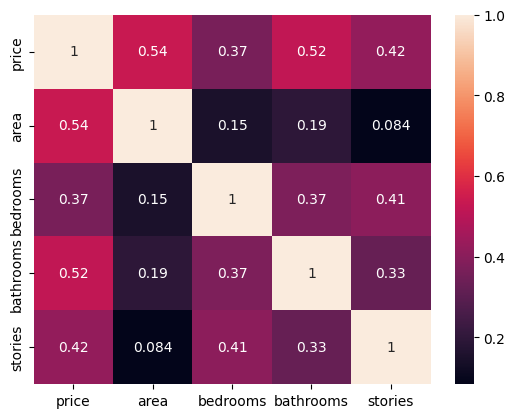

In [13]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [14]:
X = dataset.iloc[:,1:]
y = dataset['price']

In [17]:
sc = StandardScaler()
sc.fit(X)
X = pd.DataFrame(sc.transform(X),columns=X.columns)

In [18]:
X

,area,bedrooms,bathrooms,stories
0,1.046726,1.403419,1.421812,1.378217
1,1.757010,1.403419,5.405809,2.532024
2,2.218232,0.047278,1.421812,0.224410
3,1.083624,1.403419,1.421812,0.224410
4,1.046726,1.403419,-0.570187,0.224410
...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397
541,-1.268613,0.047278,-0.570187,-0.929397
542,-0.705921,-1.308863,-0.570187,-0.929397
543,-1.033389,0.047278,-0.570187,-0.929397


In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)*100

51.37585349037066

In [28]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)*100

51.37583507082051

In [29]:
r = Ridge()
r.fit(X_train,y_train)
r.score(X_test,y_test)*100

51.35248342643281